<a href="https://colab.research.google.com/github/Vrz02/DAP_PRJCT/blob/main/Copy_of_STck.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

In [3]:
files = {
 "ITC":"/content/drive/MyDrive/DAP_PRJCT/archive/ITC.csv",
    "ADANIPORTS": "/content/drive/MyDrive/DAP_PRJCT/archive/ADANIPORTS.csv",
 "ASIANPAINT": "/content/drive/MyDrive/DAP_PRJCT/archive/ASIANPAINT.csv",
 "AXISBANK": "/content/drive/MyDrive/DAP_PRJCT/archive/AXISBANK.csv",
 "BAJAJFINSV": "/content/drive/MyDrive/DAP_PRJCT/archive/BAJAJFINSV.csv",
 "BAJAJ-AUTO": "/content/drive/MyDrive/DAP_PRJCT/archive/BAJAJ-AUTO.csv",
 "BAJFINANCE": "/content/drive/MyDrive/DAP_PRJCT/archive/BAJFINANCE.csv",
 "BHARTIARTL": "/content/drive/MyDrive/DAP_PRJCT/archive/BHARTIARTL.csv",
 "BPCL": "/content/drive/MyDrive/DAP_PRJCT/archive/BPCL.csv",
 "BRITANNIA": "/content/drive/MyDrive/DAP_PRJCT/archive/BRITANNIA.csv",
 "CIPLA": "/content/drive/MyDrive/DAP_PRJCT/archive/CIPLA.csv",
 "COALINDIA": "/content/drive/MyDrive/DAP_PRJCT/archive/COALINDIA.csv",
 "DRREDDY": "/content/drive/MyDrive/DAP_PRJCT/archive/DRREDDY.csv"
}


In [4]:
# Load and clean data
def load_and_clean_data(file_path):
    df = pd.read_csv(file_path)
    df = df.drop_duplicates()
    df = df.dropna()
    df["Date"] = pd.to_datetime(df["Date"], errors='coerce')
    df = df.sort_values("Date")
    return df

In [5]:

# Load all datasets
datasets = {name: load_and_clean_data(path) for name, path in files.items()}

In [6]:
# Basic EDA
def basic_eda(df, name):
    print(f"\nSummary Statistics for {name}:")
    print(df.describe())
    print(f"\nMissing Values in {name}:\n{df.isnull().sum()}")

    plt.figure(figsize=(10, 5))
    sns.histplot(df['Close'], bins=50, kde=True)
    plt.title(f'Distribution of Closing Prices for {name}')
    plt.xlabel('Close Price')
    plt.ylabel('Frequency')
    plt.show()



Summary Statistics for ITC:
                                Date   Prev Close         Open         High  \
count                           2456  2456.000000  2456.000000  2456.000000   
mean   2016-05-12 15:18:45.732899328   276.279825   276.514902   279.374471   
min              2011-06-01 00:00:00   147.250000   148.000000   152.000000   
25%              2013-11-13 18:00:00   238.862500   239.000000   241.337500   
50%              2016-05-16 12:00:00   277.175000   277.975000   280.525000   
75%              2018-11-05 06:00:00   320.062500   320.000000   323.725000   
max              2021-04-30 00:00:00   399.700000   398.500000   409.950000   
std                              NaN    53.976590    53.867826    54.381586   

               Low         Last        Close         VWAP        Volume  \
count  2456.000000  2456.000000  2456.000000  2456.000000  2.456000e+03   
mean    273.232329   276.302077   276.283591   276.271612  1.185028e+07   
min     134.600000   147.050000   

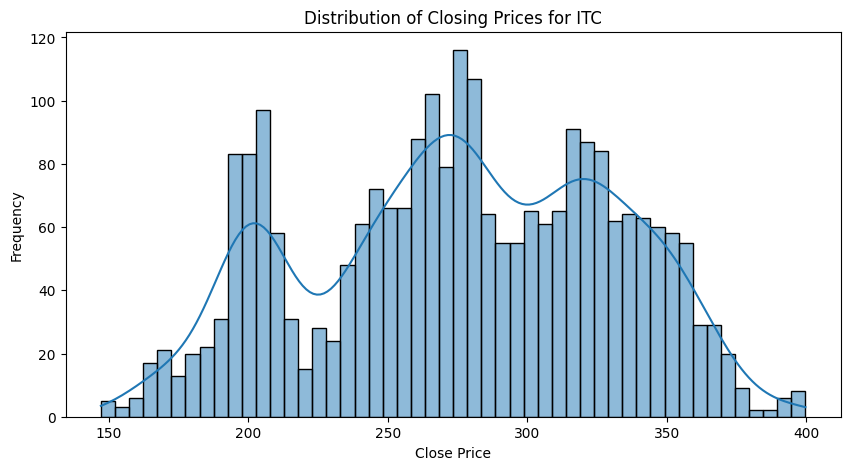


Summary Statistics for ADANIPORTS:
                                Date   Prev Close         Open         High  \
count                           2456  2456.000000  2456.000000  2456.000000   
mean   2016-05-12 15:18:45.732899328   284.395786   284.940574   289.532431   
min              2011-06-01 00:00:00   108.000000   108.000000   110.450000   
25%              2013-11-13 18:00:00   157.025000   156.925000   160.312500   
50%              2016-05-16 12:00:00   298.650000   299.475000   303.825000   
75%              2018-11-05 06:00:00   368.162500   368.812500   373.925000   
max              2021-04-30 00:00:00   835.550000   857.000000   885.000000   
std                              NaN   121.251219   121.652830   123.447474   

               Low         Last       Close         VWAP        Volume  \
count  2456.000000  2456.000000  2456.00000  2456.000000  2.456000e+03   
mean    279.773270   284.617060   284.62730   284.788009  3.747508e+06   
min     105.650000   108.00000

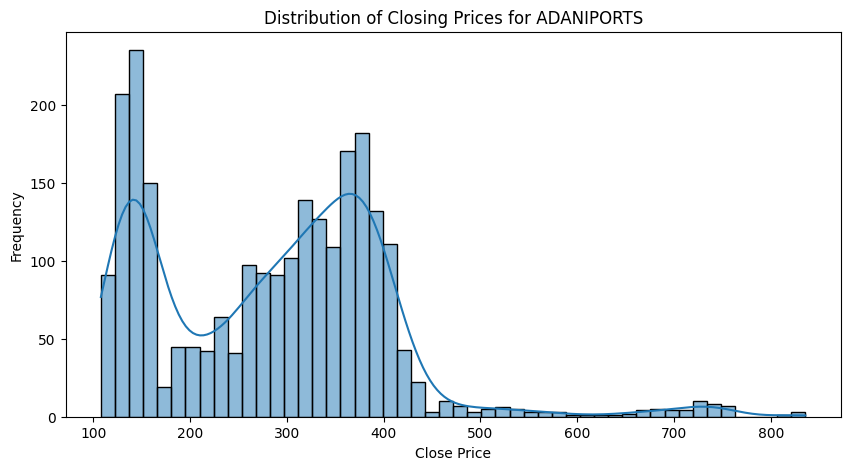


Summary Statistics for ASIANPAINT:
                                Date   Prev Close         Open         High  \
count                           2456  2456.000000  2456.000000  2456.000000   
mean   2016-05-12 15:18:45.732899328  1753.838742  1753.773270  1774.984243   
min              2011-06-01 00:00:00   392.000000   389.700000   402.850000   
25%              2013-11-13 18:00:00   873.400000   874.000000   883.950000   
50%              2016-05-16 12:00:00  1286.250000  1281.600000  1298.950000   
75%              2018-11-05 06:00:00  2433.112500  2437.000000  2468.887500   
max              2021-04-30 00:00:00  5213.100000  5221.100000  5247.750000   
std                              NaN  1198.753680  1197.232387  1212.334523   

               Low         Last        Close         VWAP        Volume  \
count  2456.000000  2456.000000  2456.000000  2456.000000  2.456000e+03   
mean   1733.030639  1753.631026  1753.595664  1754.035094  1.060765e+06   
min     373.400000   389.30

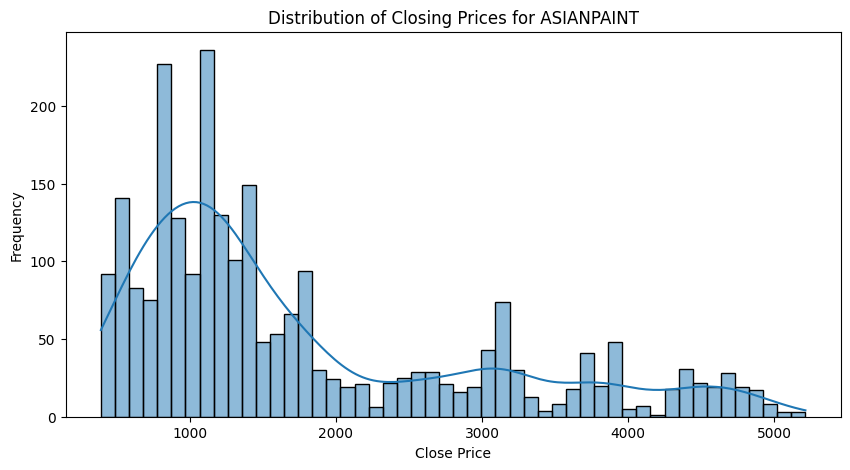


Summary Statistics for AXISBANK:
                                Date   Prev Close         Open         High  \
count                           2456  2456.000000  2456.000000  2456.000000   
mean   2016-05-12 15:18:45.732899328   773.969849   774.324980   785.385851   
min              2011-06-01 00:00:00   303.150000   293.500000   337.500000   
25%              2013-11-13 18:00:00   507.487500   507.612500   513.587500   
50%              2016-05-16 12:00:00   616.975000   617.150000   624.375000   
75%              2018-11-05 06:00:00  1056.250000  1057.125000  1079.100000   
max              2021-04-30 00:00:00  2023.350000  2034.400000  2043.050000   
std                              NaN   356.893912   356.540253   361.634288   

               Low         Last        Close         VWAP        Volume  \
count  2456.000000  2456.000000  2456.000000  2456.000000  2.456000e+03   
mean    762.322883   773.711279   773.738742   773.934279  8.749907e+06   
min     286.000000   304.8000

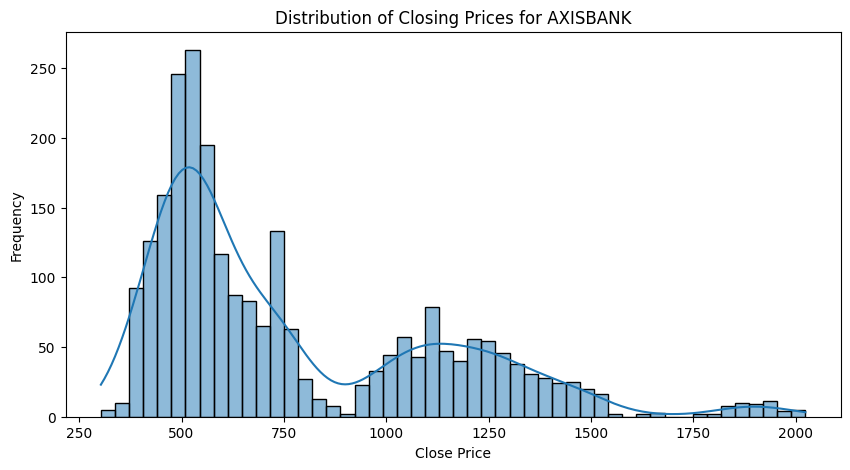


Summary Statistics for BAJAJFINSV:
                                Date    Prev Close          Open  \
count                           2456   2456.000000   2456.000000   
mean   2016-05-12 15:18:45.732899328   3478.457919   3484.883713   
min              2011-06-01 00:00:00    400.100000    340.000000   
25%              2013-11-13 18:00:00    818.225000    814.975000   
50%              2016-05-16 12:00:00   1968.250000   1969.225000   
75%              2018-11-05 06:00:00   5819.112500   5815.750000   
max              2021-04-30 00:00:00  11176.550000  11000.000000   
std                              NaN   2912.776647   2917.370667   

               High           Low          Last         Close          VWAP  \
count   2456.000000   2456.000000   2456.000000   2456.000000   2456.000000   
mean    3538.150428   3430.660708   3482.948453   3482.742630   3485.558400   
min      409.000000    340.000000    402.950000    400.100000    402.320000   
25%      831.425000    804.150000  

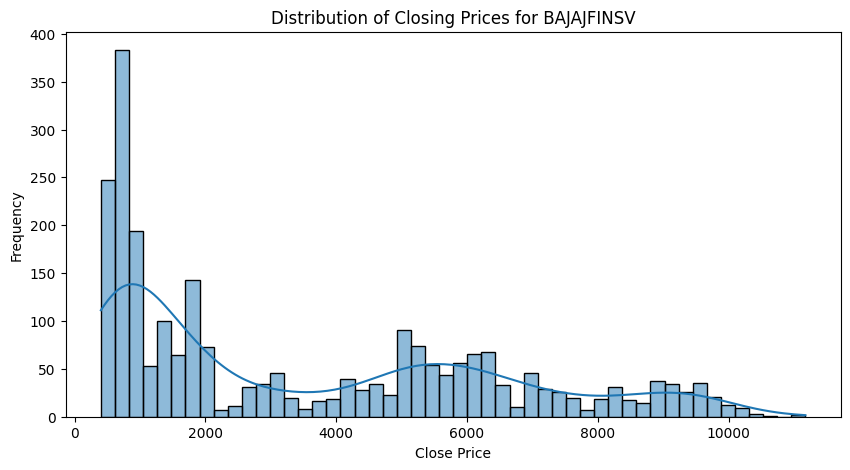


Summary Statistics for BAJAJ-AUTO:
                                Date   Prev Close         Open         High  \
count                           2456  2456.000000  2456.000000  2456.000000   
mean   2016-05-12 15:18:45.732899328  2465.300285  2467.863986  2497.442447   
min              2011-06-01 00:00:00  1311.800000  1320.000000  1329.000000   
25%              2013-11-13 18:00:00  1978.737500  1980.450000  2009.000000   
50%              2016-05-16 12:00:00  2536.375000  2535.125000  2569.500000   
75%              2018-11-05 06:00:00  2874.150000  2880.000000  2910.000000   
max              2021-04-30 00:00:00  4237.450000  4260.000000  4361.400000   
std                              NaN   573.472714   574.785879   579.582009   

               Low         Last        Close         VWAP        Volume  \
count  2456.000000  2456.000000  2456.000000  2456.000000  2.456000e+03   
mean   2436.705680  2466.142121  2466.313823  2467.207891  4.472163e+05   
min    1295.000000  1322.00

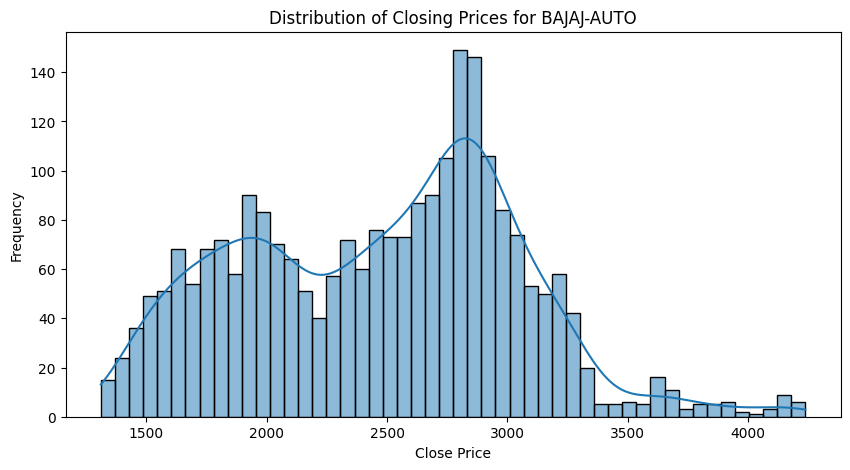


Summary Statistics for BAJFINANCE:
                                Date    Prev Close          Open  \
count                           2456   2456.000000   2456.000000   
mean   2016-05-12 15:18:45.732899328   2758.688090   2760.690391   
min              2011-06-01 00:00:00    566.100000    560.000000   
25%              2013-11-13 18:00:00   1278.750000   1278.650000   
50%              2016-05-16 12:00:00   2142.950000   2146.500000   
75%              2018-11-05 06:00:00   3980.887500   3979.250000   
max              2021-04-30 00:00:00  11393.300000  11300.000000   
std                              NaN   1960.084614   1959.619722   

               High           Low          Last         Close          VWAP  \
count   2456.000000   2456.000000   2456.000000   2456.000000   2456.000000   
mean    2804.999104   2714.268037   2760.722964   2760.656820   2760.825920   
min      572.000000    553.800000    566.000000    566.100000    566.550000   
25%     1298.000000   1260.000000  

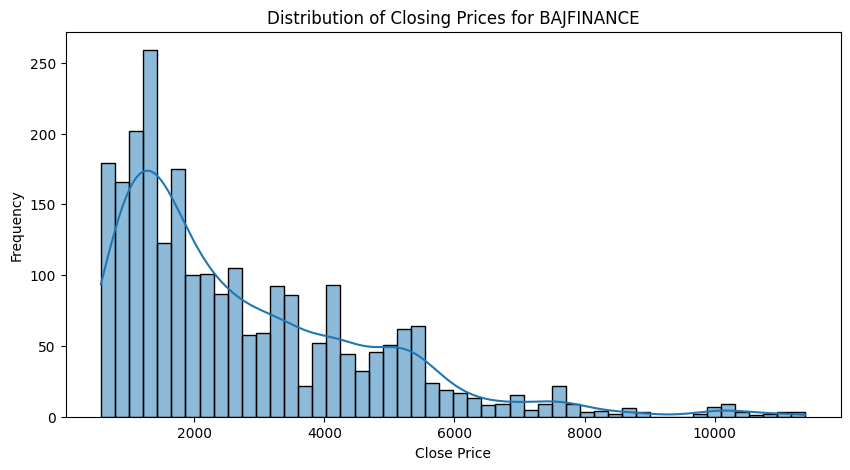


Summary Statistics for BHARTIARTL:
                                Date   Prev Close         Open         High  \
count                           2456  2456.000000  2456.000000  2456.000000   
mean   2016-05-12 15:18:45.732899328   376.235322   376.746254   382.385729   
min              2011-06-01 00:00:00   242.300000   240.000000   243.850000   
25%              2013-11-13 18:00:00   323.937500   324.762500   329.325000   
50%              2016-05-16 12:00:00   355.375000   355.500000   361.550000   
75%              2018-11-05 06:00:00   404.537500   405.000000   410.287500   
max              2021-04-30 00:00:00   608.850000   614.900000   623.000000   
std                              NaN    74.355862    74.804779    75.781220   

               Low         Last        Close         VWAP        Volume  \
count  2456.000000  2456.000000  2456.000000  2456.000000  2.456000e+03   
mean    370.491836   376.303807   376.301527   376.432728  7.499628e+06   
min     215.800000   241.10

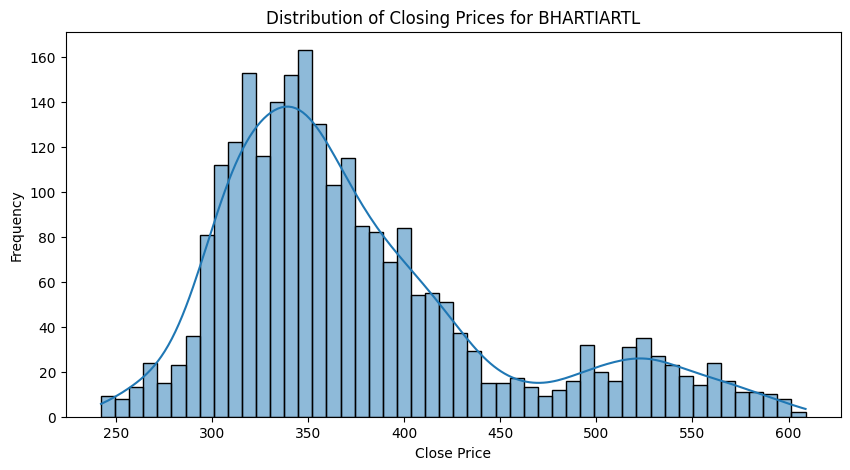


Summary Statistics for BPCL:
                                Date   Prev Close         Open         High  \
count                           2456  2456.000000  2456.000000  2456.000000   
mean   2016-05-12 15:18:45.732899328   536.090941   536.581413   544.754316   
min              2011-06-01 00:00:00   257.200000   252.600000   268.100000   
25%              2013-11-13 18:00:00   375.187500   376.000000   382.000000   
50%              2016-05-16 12:00:00   483.725000   484.425000   492.075000   
75%              2018-11-05 06:00:00   669.100000   669.812500   678.950000   
max              2021-04-30 00:00:00  1133.300000  1132.200000  1156.000000   
std                              NaN   187.640460   187.718932   189.817928   

               Low         Last        Close         VWAP        Volume  \
count  2456.000000  2456.000000  2456.000000  2456.000000  2.456000e+03   
mean    528.077667   536.015656   536.004947   536.443546  3.677708e+06   
min     238.550000   256.550000  

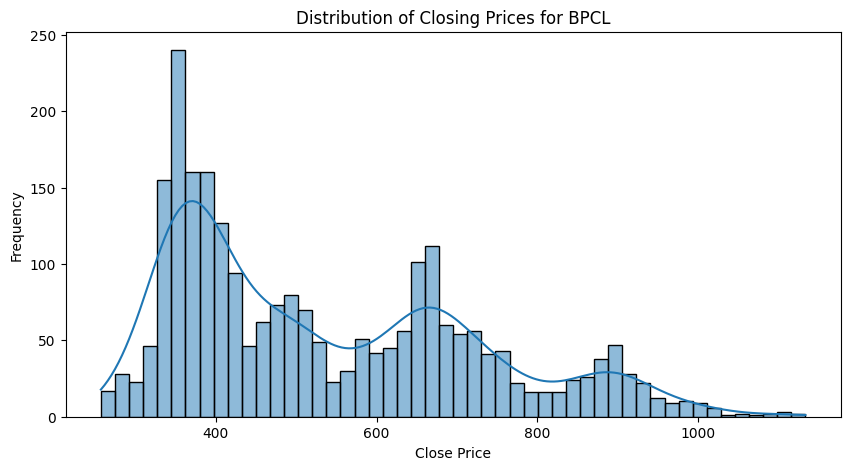


Summary Statistics for BRITANNIA:
                                Date   Prev Close         Open         High  \
count                           2456  2456.000000  2456.000000  2456.000000   
mean   2016-05-12 15:18:45.732899328  2507.272781  2510.947781  2541.027280   
min              2011-06-01 00:00:00   420.500000   380.000000   429.000000   
25%              2013-11-13 18:00:00   855.925000   856.212500   868.750000   
50%              2016-05-16 12:00:00  2836.525000  2840.850000  2872.825000   
75%              2018-11-05 06:00:00  3431.250000  3431.062500  3475.000000   
max              2021-04-30 00:00:00  6900.150000  6918.000000  6934.350000   
std                              NaN  1591.378279  1593.587585  1607.996132   

               Low         Last        Close         VWAP        Volume  \
count  2456.000000  2456.000000  2456.000000  2456.000000  2.456000e+03   
mean   2478.350489  2508.759731  2508.505884  2510.152276  2.482909e+05   
min     380.000000   420.950

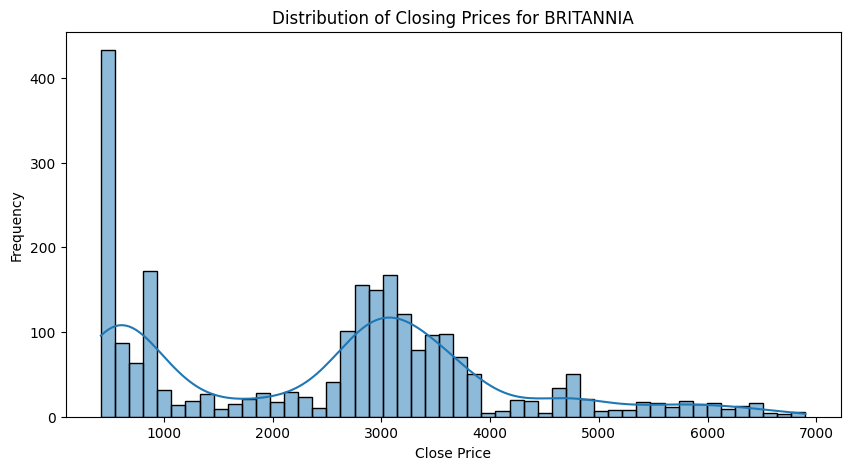


Summary Statistics for CIPLA:
                                Date   Prev Close         Open         High  \
count                           2456  2456.000000  2456.000000  2456.000000   
mean   2016-05-12 15:18:45.732899328   524.067997   525.258774   531.670827   
min              2011-06-01 00:00:00   274.500000   274.500000   277.000000   
25%              2013-11-13 18:00:00   404.462500   405.037500   410.025000   
50%              2016-05-16 12:00:00   539.675000   539.775000   545.950000   
75%              2018-11-05 06:00:00   617.150000   618.512500   628.025000   
max              2021-04-30 00:00:00   949.300000   965.100000   966.350000   
std                              NaN   136.883428   137.543023   139.388193   

               Low         Last        Close         VWAP        Volume  \
count  2456.000000  2456.000000  2456.000000  2456.000000  2.456000e+03   
mean    517.884222   524.359894   524.305904   524.857948  2.427950e+06   
min     272.850000   273.850000 

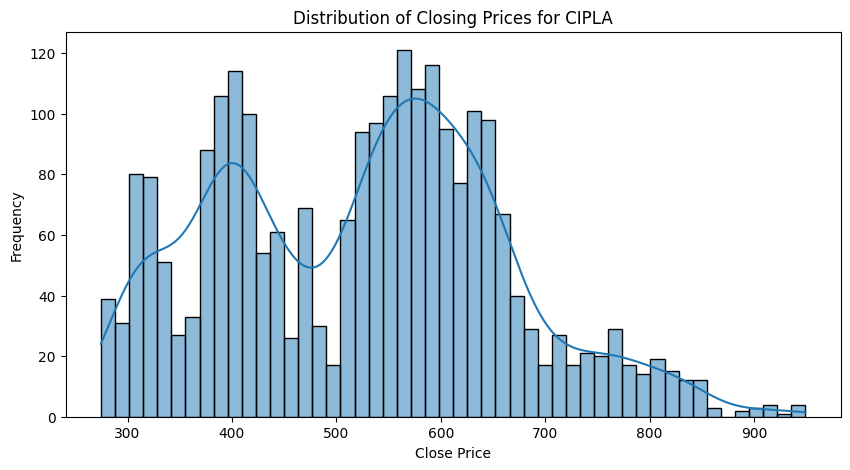


Summary Statistics for COALINDIA:
                                Date   Prev Close         Open         High  \
count                           2456  2456.000000  2456.000000  2456.000000   
mean   2016-05-12 15:18:45.732899328   285.359446   285.570012   289.110627   
min              2011-06-01 00:00:00   110.550000   110.850000   112.450000   
25%              2013-11-13 18:00:00   251.212500   251.487500   253.825000   
50%              2016-05-16 12:00:00   295.650000   295.800000   299.400000   
75%              2018-11-05 06:00:00   339.625000   340.000000   344.012500   
max              2021-04-30 00:00:00   443.400000   445.000000   447.100000   
std                              NaN    75.053198    75.104721    75.966263   

               Low         Last        Close         VWAP        Volume  \
count  2456.000000  2456.000000  2456.000000  2456.000000  2.456000e+03   
mean    281.633408   285.255721   285.247313   285.385660  5.426756e+06   
min     109.550000   110.600

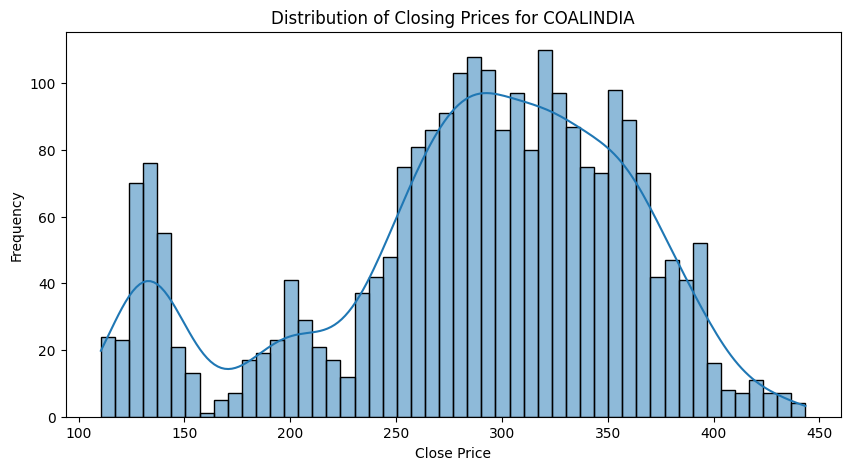


Summary Statistics for DRREDDY:
                                Date   Prev Close         Open         High  \
count                           2456  2456.000000  2456.000000  2456.000000   
mean   2016-05-12 15:18:45.732899328  2772.513294  2776.286279  2809.138742   
min              2011-06-01 00:00:00  1412.150000  1412.150000  1455.000000   
25%              2013-11-13 18:00:00  2155.825000  2150.037500  2193.412500   
50%              2016-05-16 12:00:00  2652.450000  2652.000000  2680.000000   
75%              2018-11-05 06:00:00  3159.000000  3160.500000  3197.625000   
max              2021-04-30 00:00:00  5416.800000  5440.950000  5512.650000   
std                              NaN   880.839631   884.553118   895.458394   

               Low         Last        Close         VWAP        Volume  \
count  2456.000000  2456.000000  2456.000000  2456.000000  2.456000e+03   
mean   2740.953970  2773.742325  2773.957614  2775.512093  6.093722e+05   
min    1386.100000  1411.00000

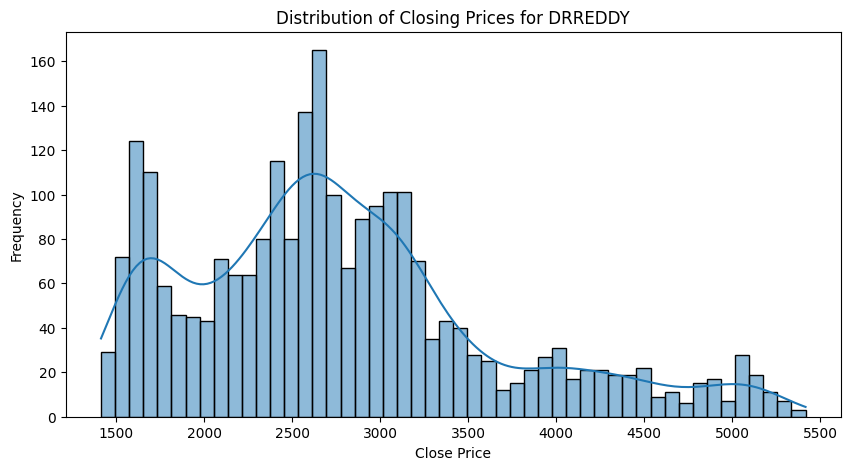

In [7]:
for name, df in datasets.items():
    basic_eda(df, name)

In [8]:
# Business Logic: Moving Average Calculation
def moving_average(df, window=20):
    df[f"MA_{window}"] = df['Close'].rolling(window=window).mean()
    return df

In [9]:
# Apply moving average to all datasets
datasets = {name: moving_average(df) for name, df in datasets.items()}

In [12]:
def plot_trend(df, name):
    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
    plt.plot(df['Date'], df['MA_20'], label='20-day MA', color='red', linestyle='dashed')
    plt.title(f'Stock Price Trend for {name}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

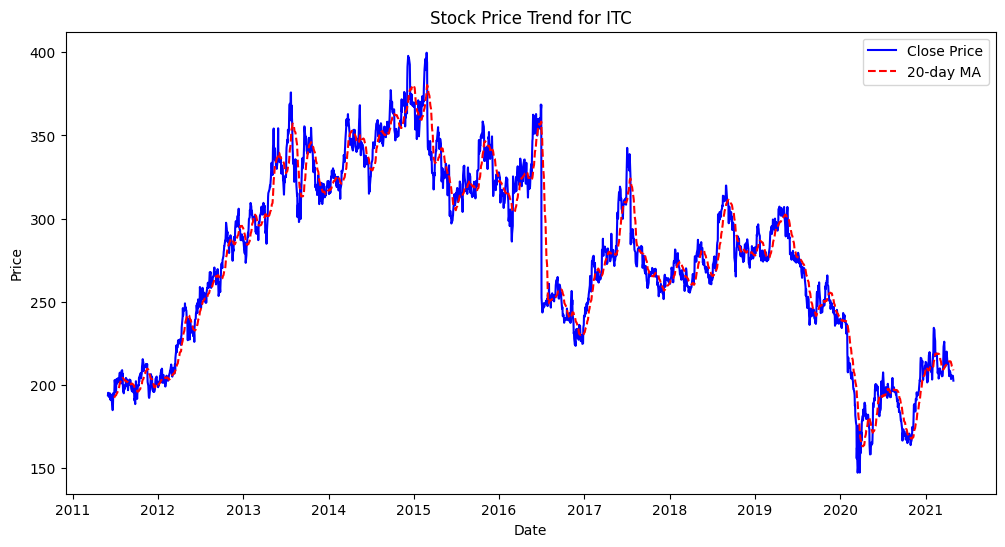

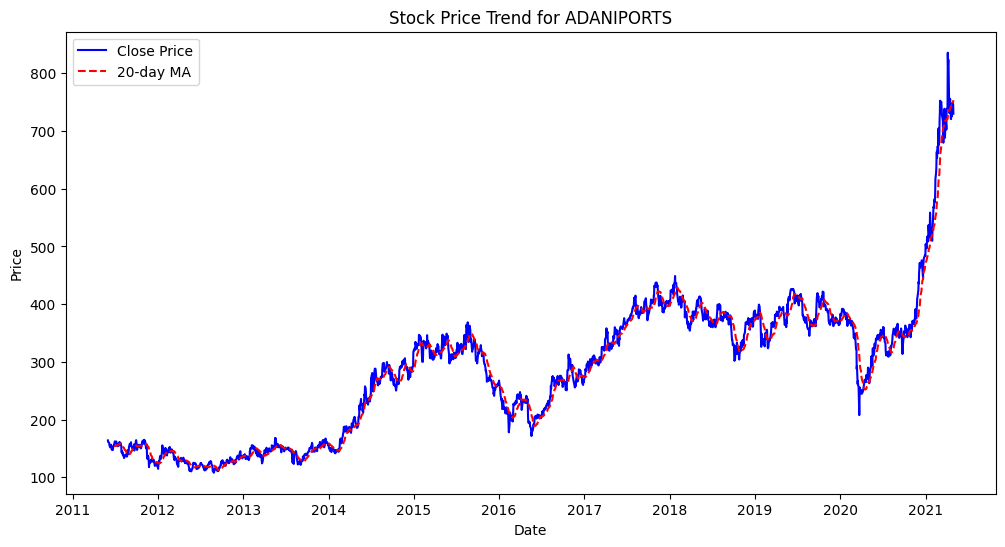

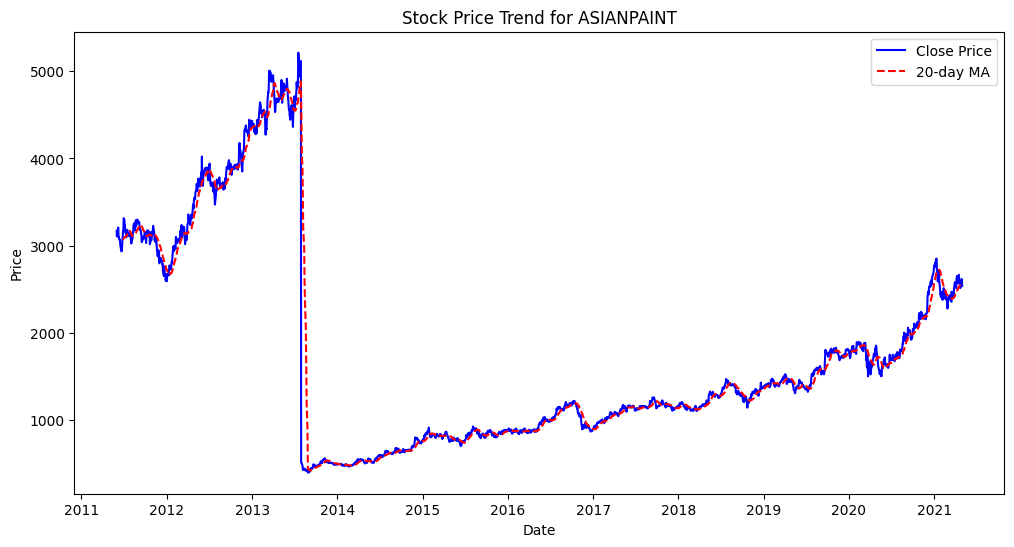

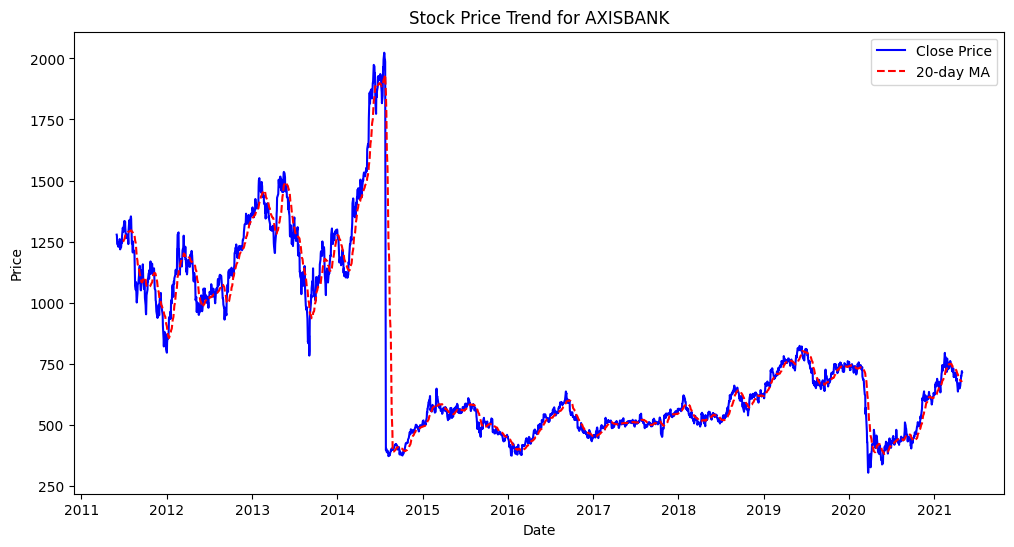

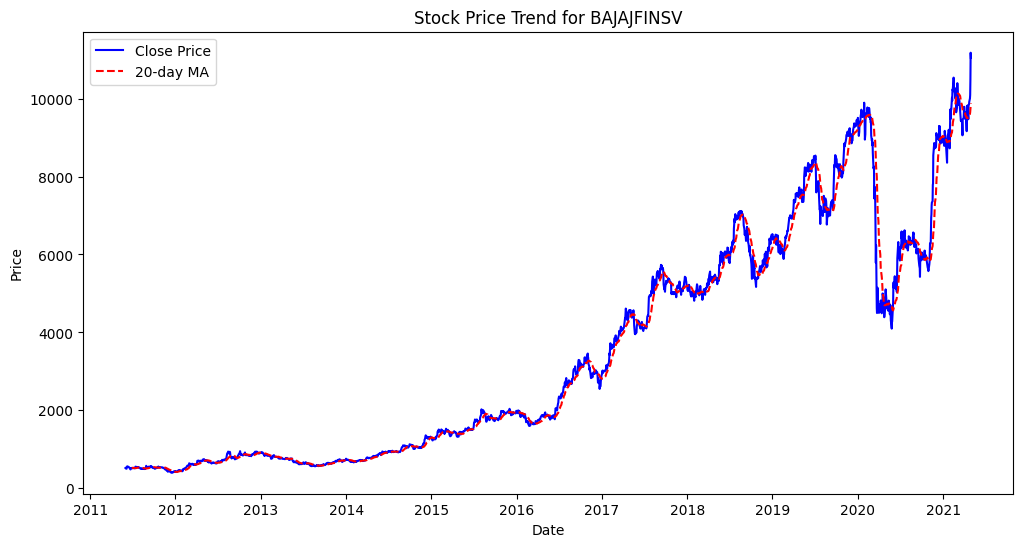

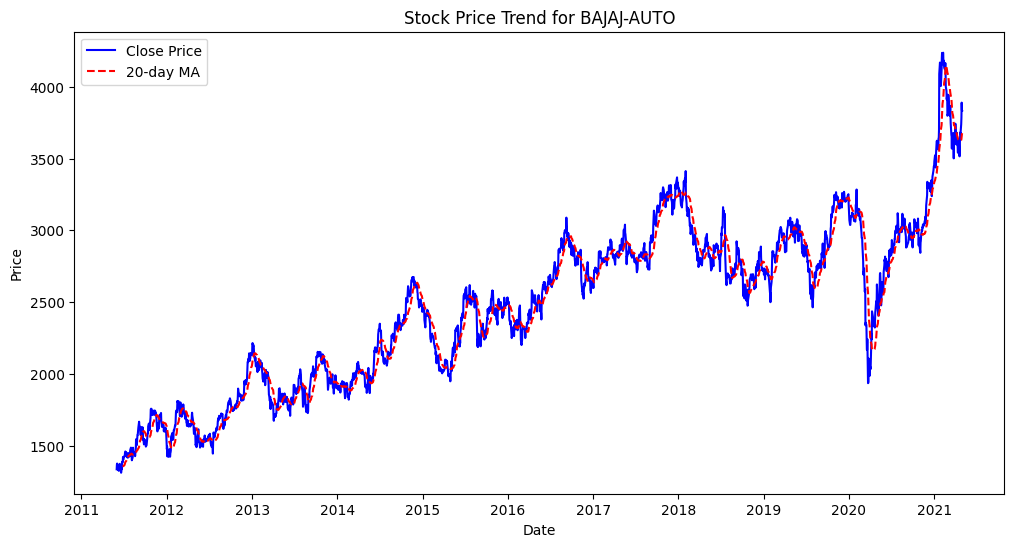

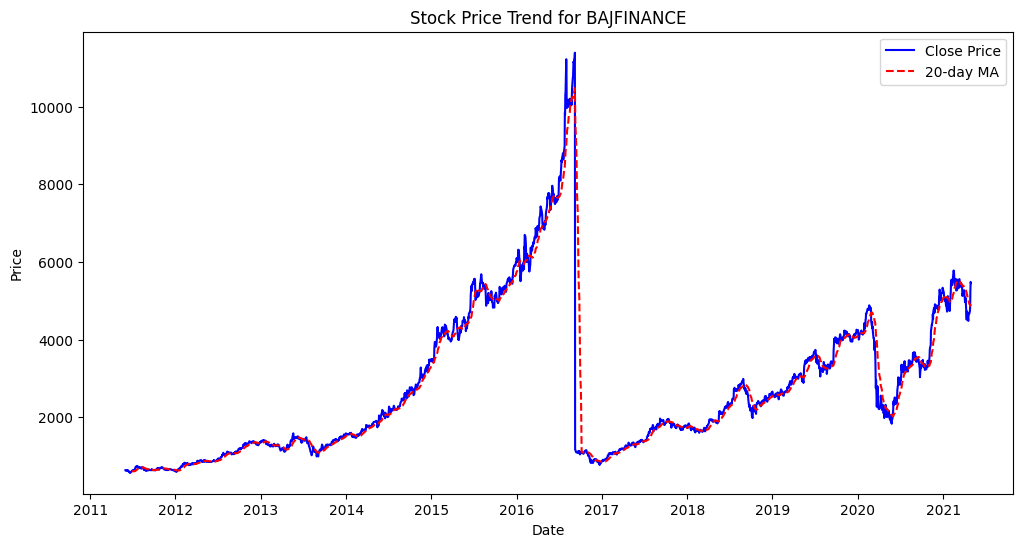

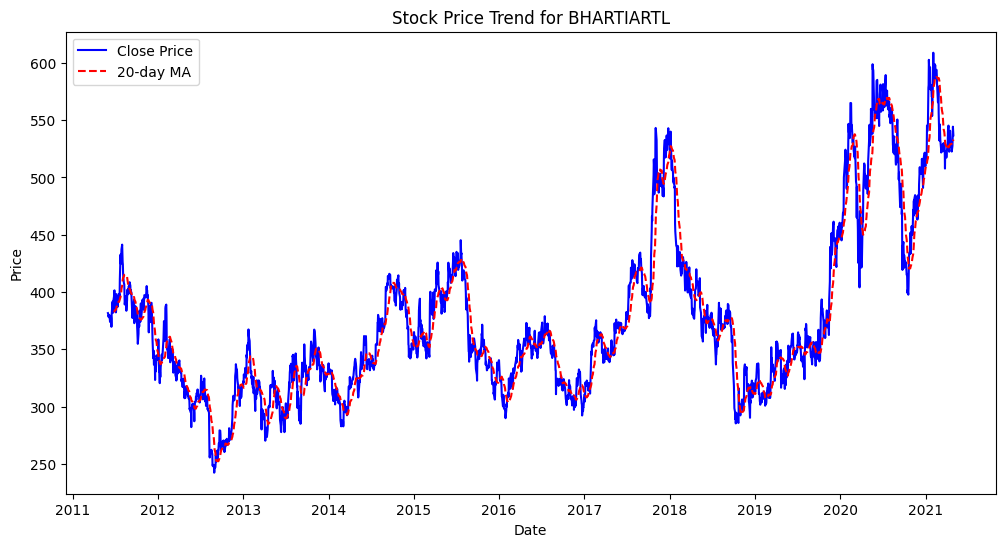

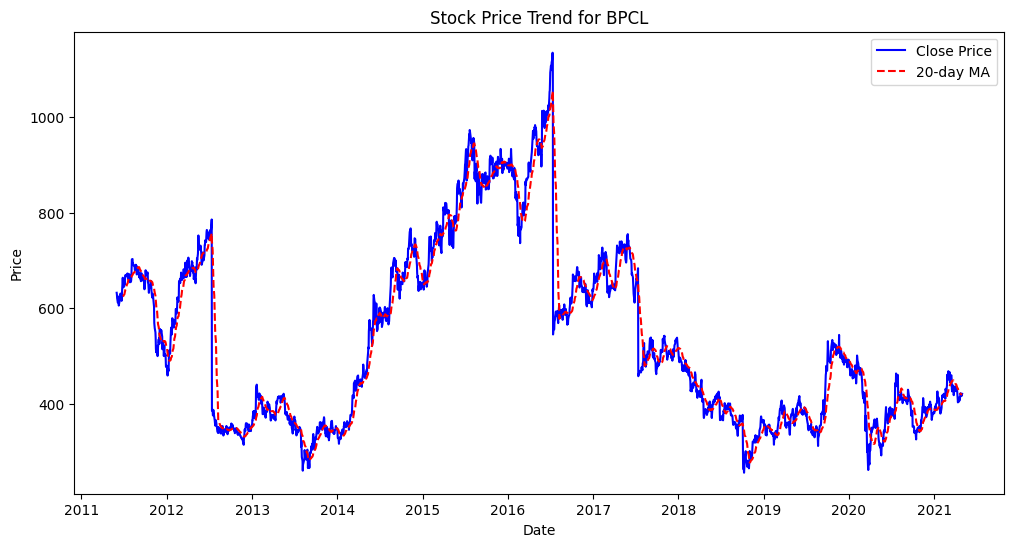

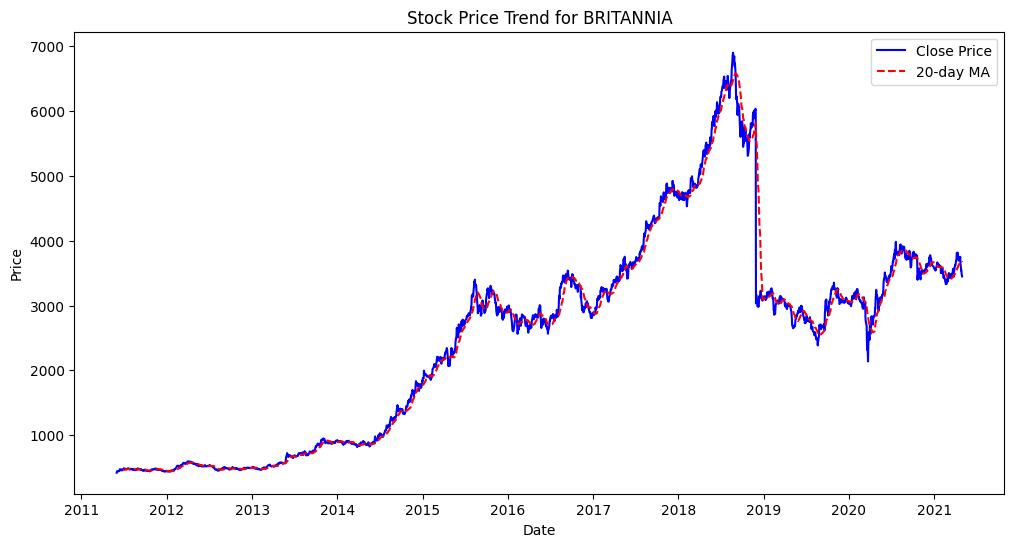

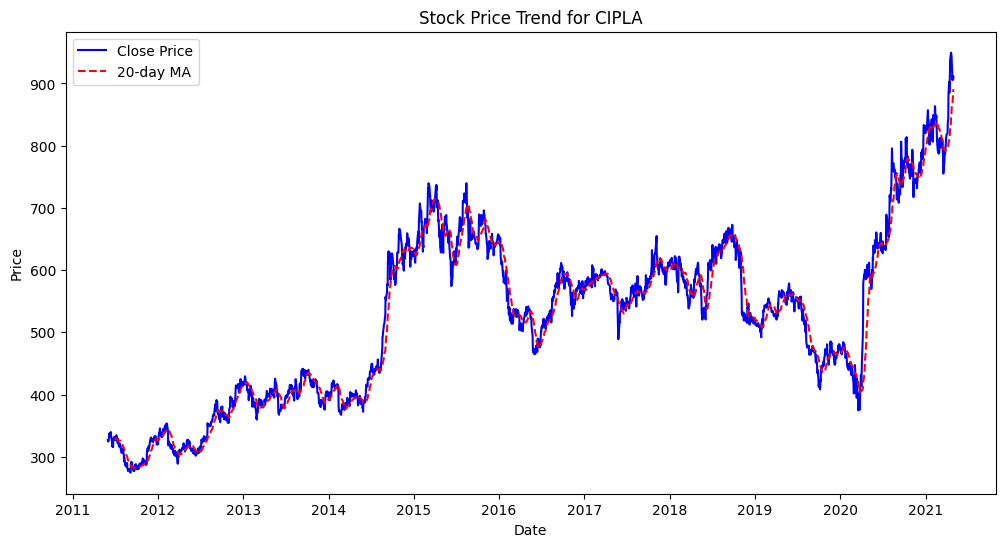

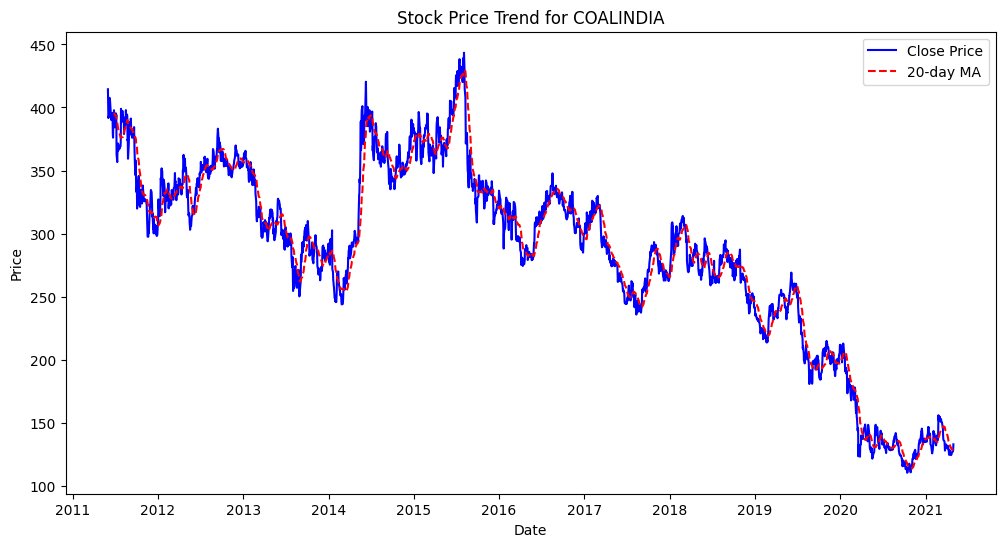

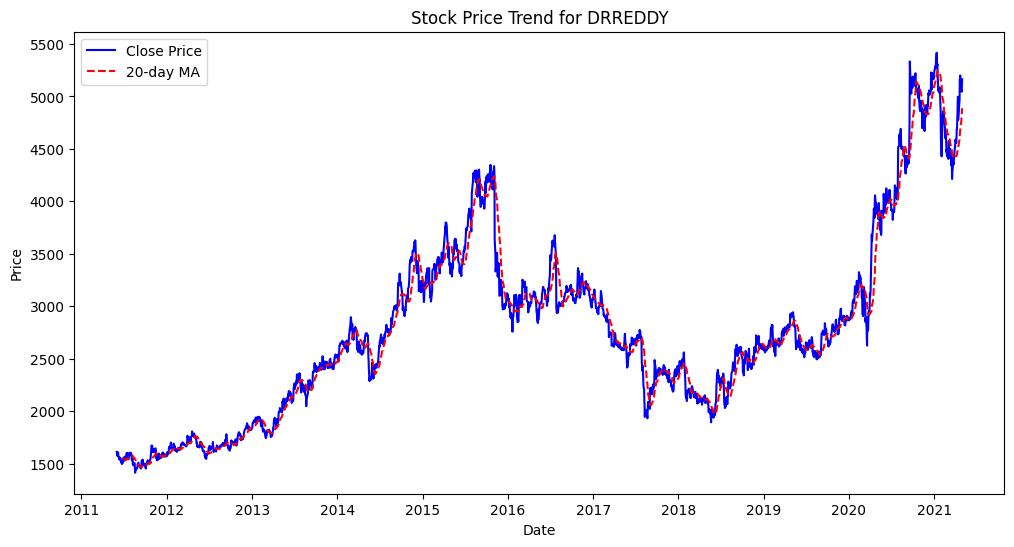

In [13]:
for name, df in datasets.items():
    plot_trend(df, name)

In [15]:
# ARIMA Model for Forecasting
def arima_forecast(df, name, steps=30):
    model = ARIMA(df['Close'], order=(5,1,0))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=steps)

    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], df['Close'], label='Historical Prices')
    future_dates = pd.date_range(df['Date'].iloc[-1], periods=steps+1, freq='D')[1:]
    plt.plot(future_dates, forecast, label='Forecast', color='red')
    plt.title(f'ARIMA Forecast for {name}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

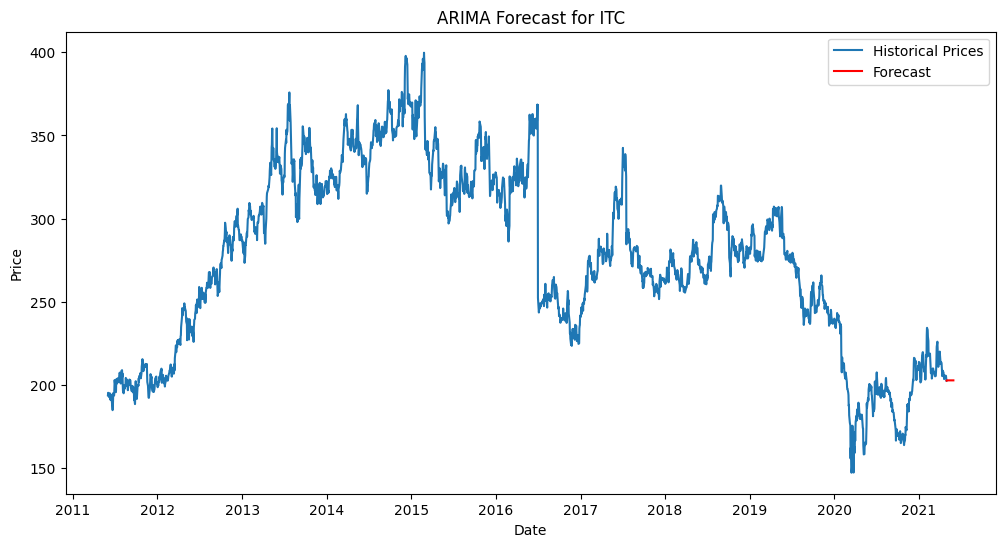

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

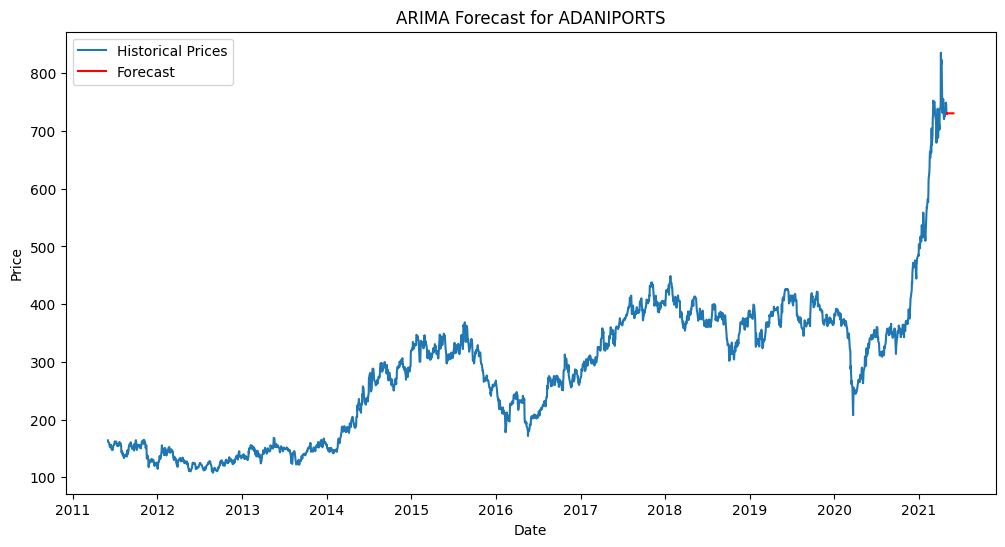

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

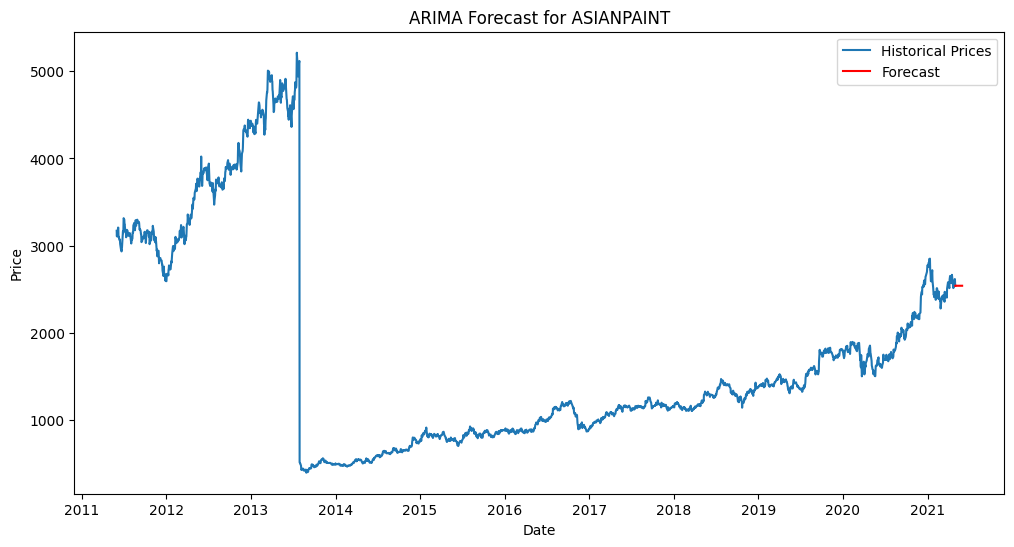

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

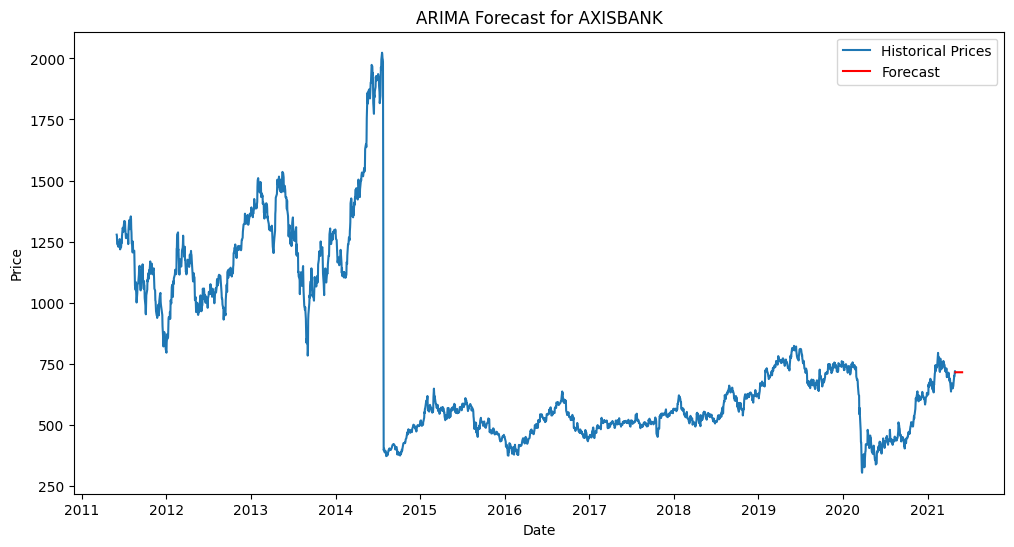

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

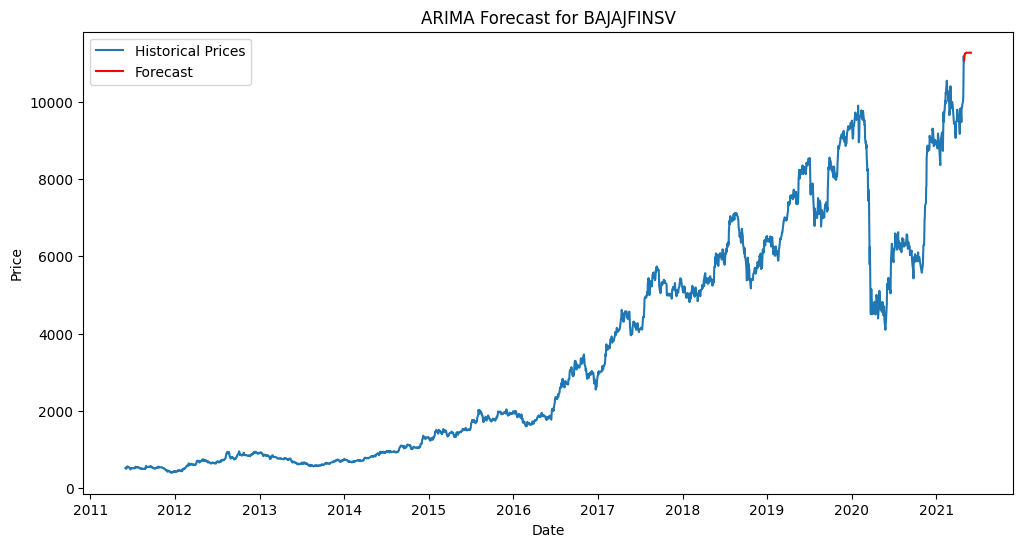

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

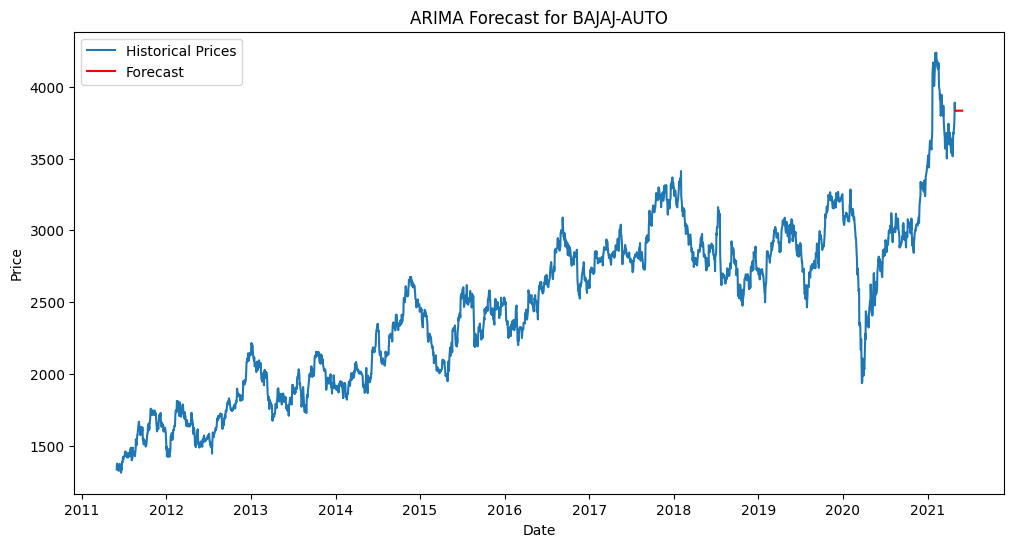

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

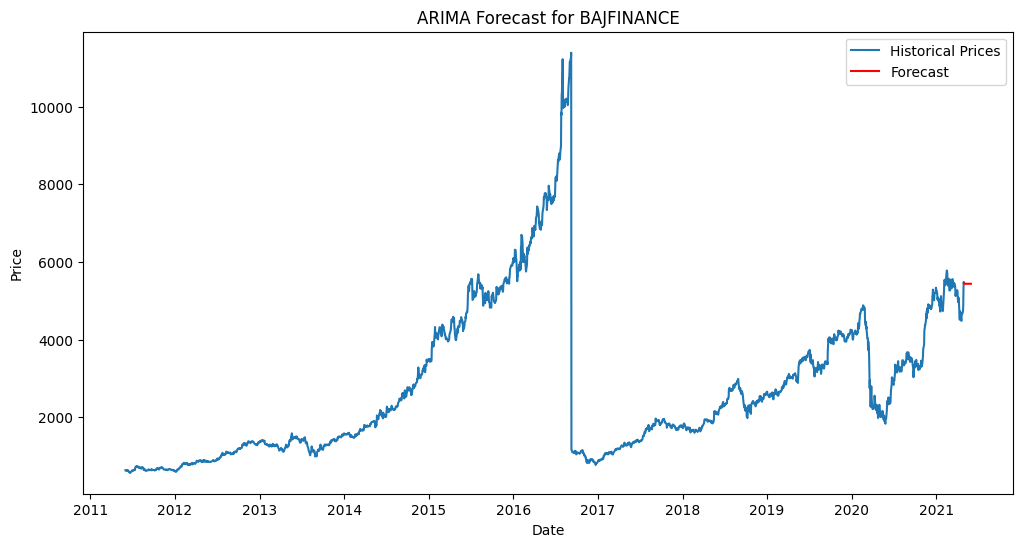

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

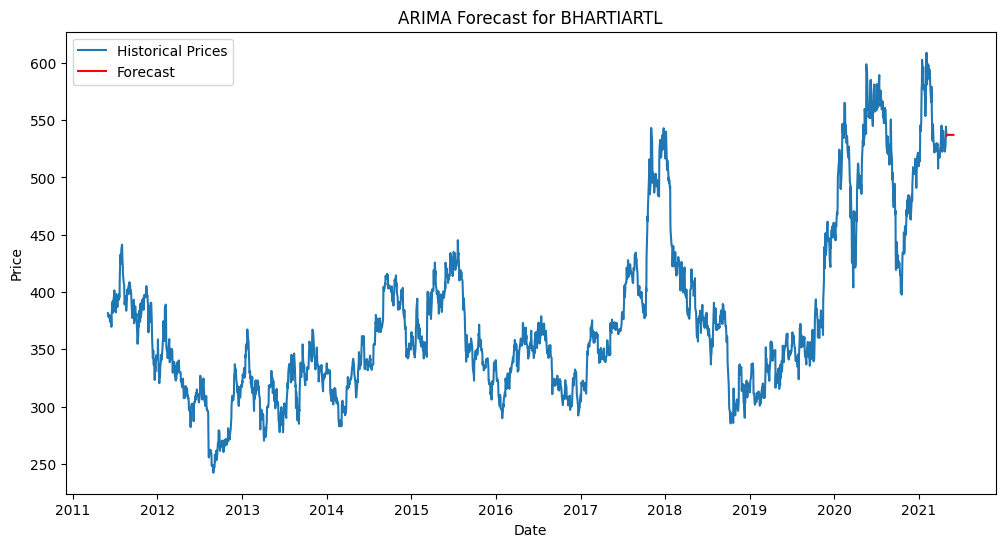

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

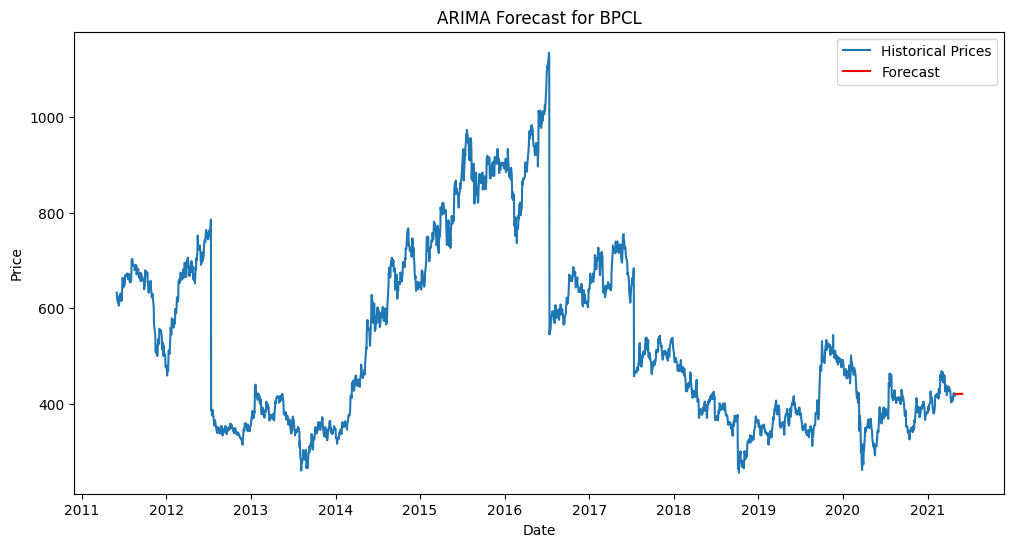

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

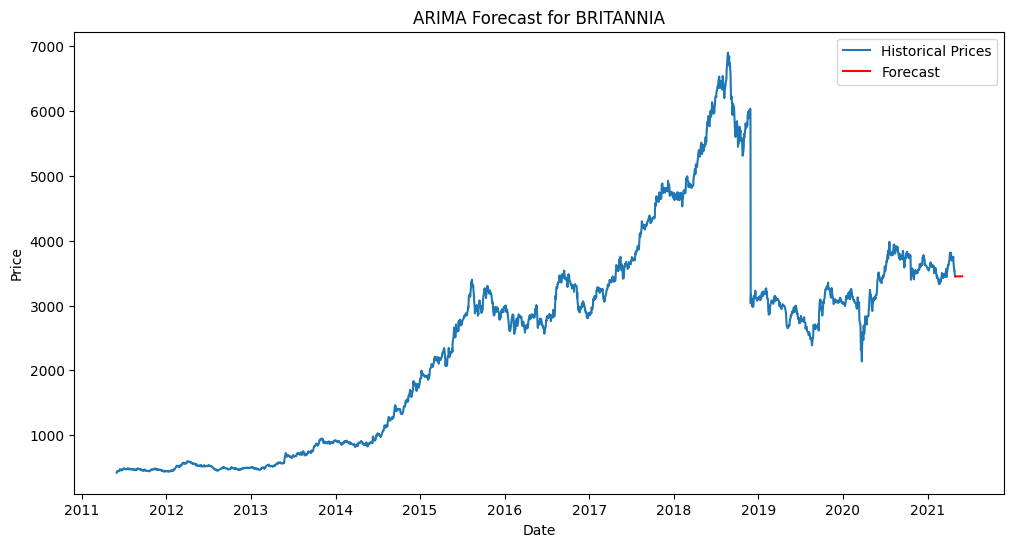

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

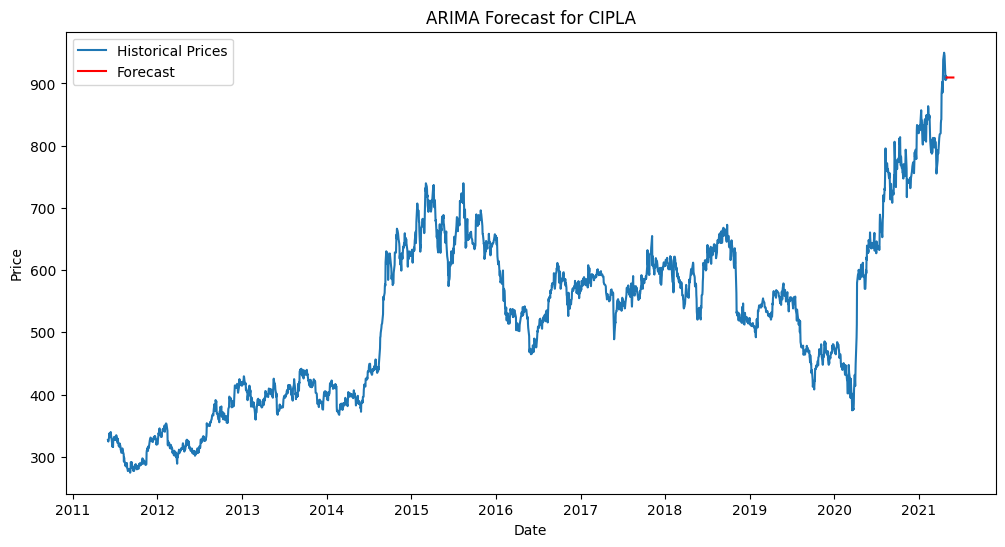

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

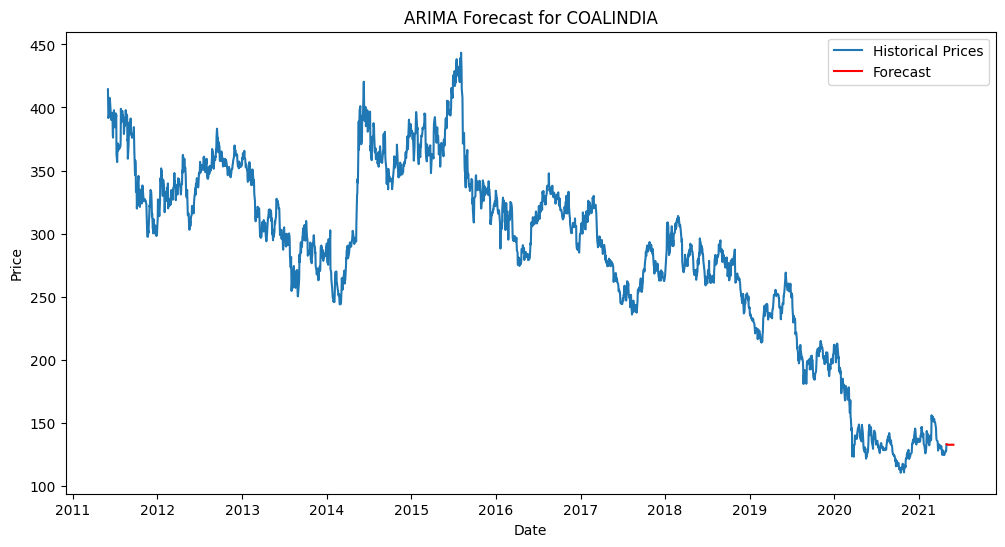

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

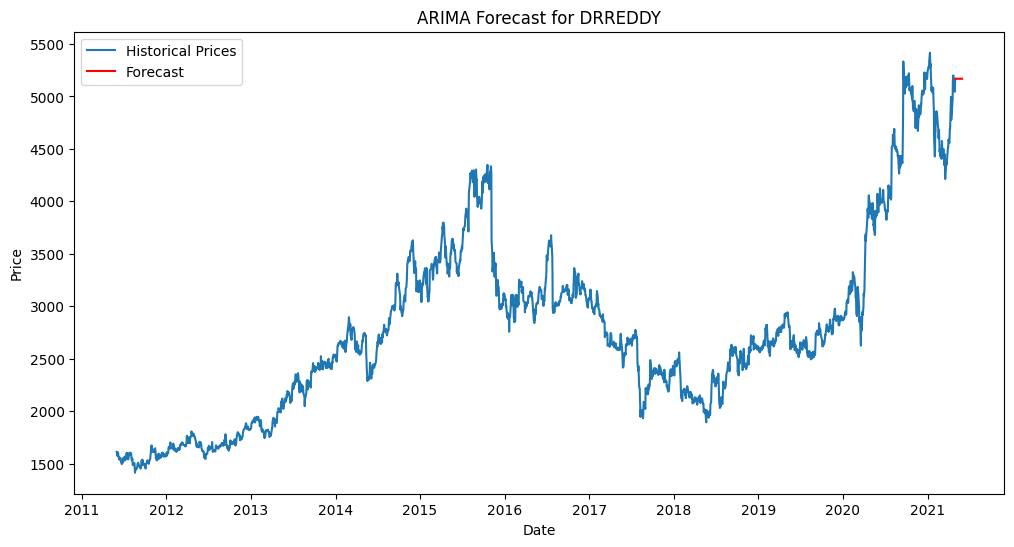

In [16]:
for name, df in datasets.items():
    arima_forecast(df, name)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


150/150 ━━━━━━━━━━━━━━━━━━━━ 12s 44ms/step - loss: 0.0566
Epoch 2/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.0042
Epoch 3/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0034
Epoch 4/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0028
Epoch 5/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.0026
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


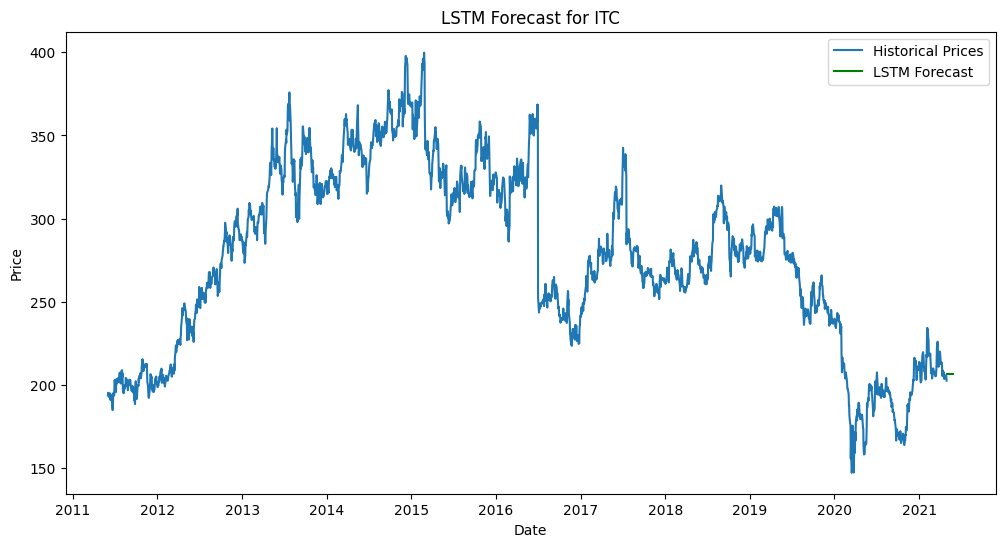

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


150/150 ━━━━━━━━━━━━━━━━━━━━ 12s 49ms/step - loss: 0.0105
Epoch 2/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - loss: 0.0012
Epoch 3/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 9.2299e-04
Epoch 4/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - loss: 7.7385e-04
Epoch 5/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - loss: 7.3752e-04
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


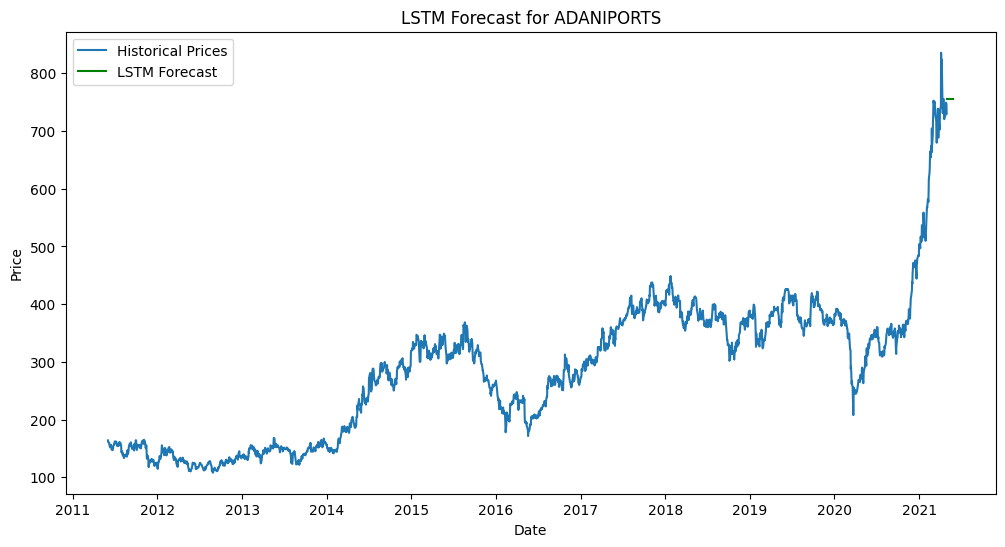

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


150/150 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - loss: 0.0247
Epoch 2/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 0.0036
Epoch 3/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 12s 58ms/step - loss: 0.0020
Epoch 4/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - loss: 0.0011
Epoch 5/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.0038
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


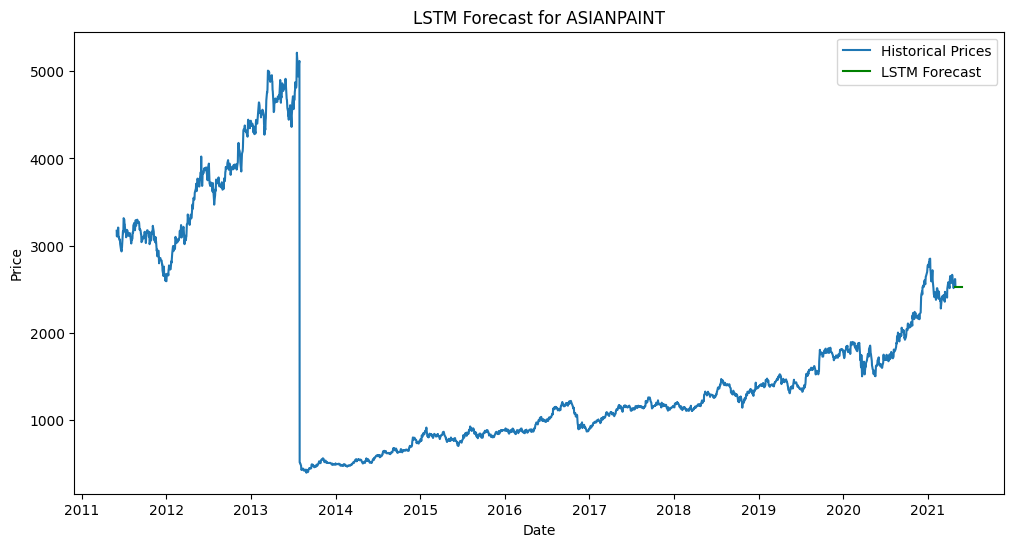

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


150/150 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - loss: 0.0159
Epoch 2/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 0.0032
Epoch 3/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - loss: 0.0032
Epoch 4/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 0.0033
Epoch 5/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - loss: 0.0020
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


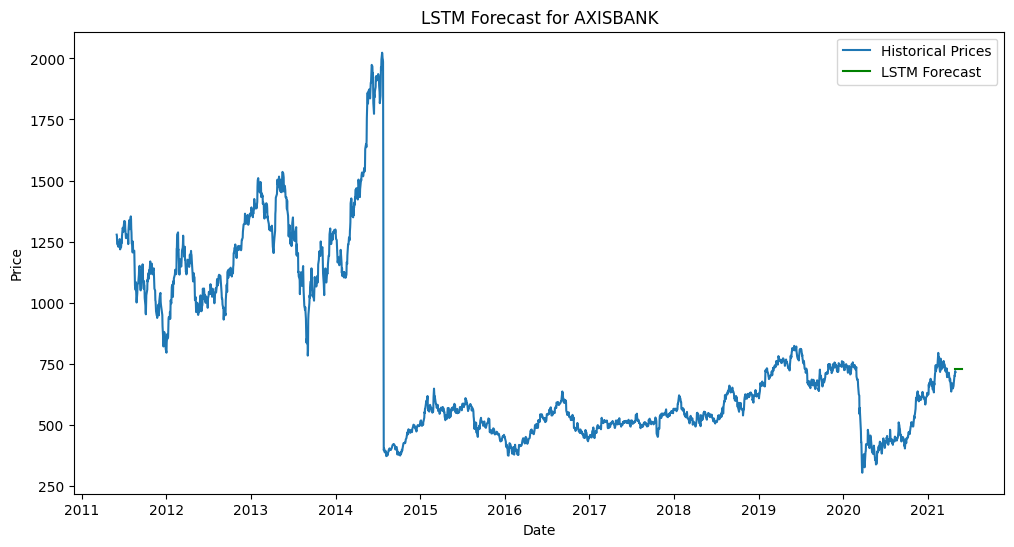

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


150/150 ━━━━━━━━━━━━━━━━━━━━ 17s 86ms/step - loss: 0.0165
Epoch 2/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - loss: 0.0019
Epoch 3/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - loss: 0.0013
Epoch 4/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - loss: 0.0012
Epoch 5/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - loss: 0.0013


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


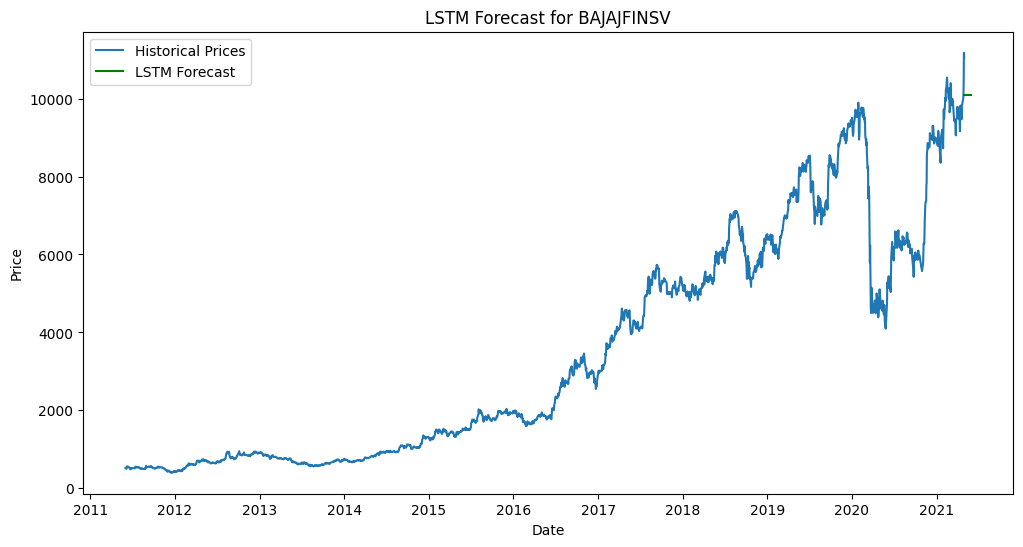

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


150/150 ━━━━━━━━━━━━━━━━━━━━ 13s 61ms/step - loss: 0.0298
Epoch 2/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 0.0027
Epoch 3/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - loss: 0.0018
Epoch 4/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - loss: 0.0018
Epoch 5/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0015


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


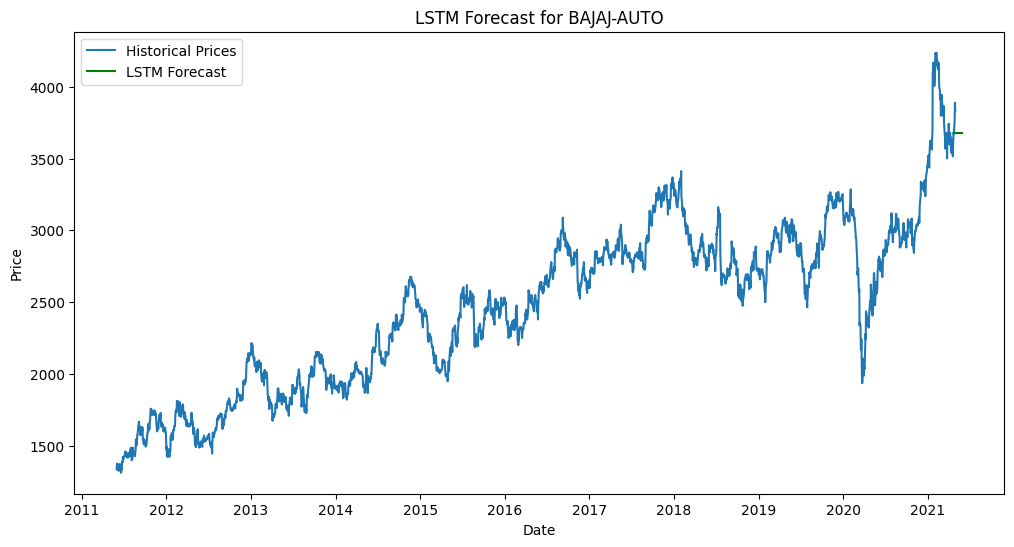

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


150/150 ━━━━━━━━━━━━━━━━━━━━ 12s 49ms/step - loss: 0.0074
Epoch 2/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - loss: 0.0032
Epoch 3/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - loss: 0.0015
Epoch 4/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0014
Epoch 5/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - loss: 0.0033
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


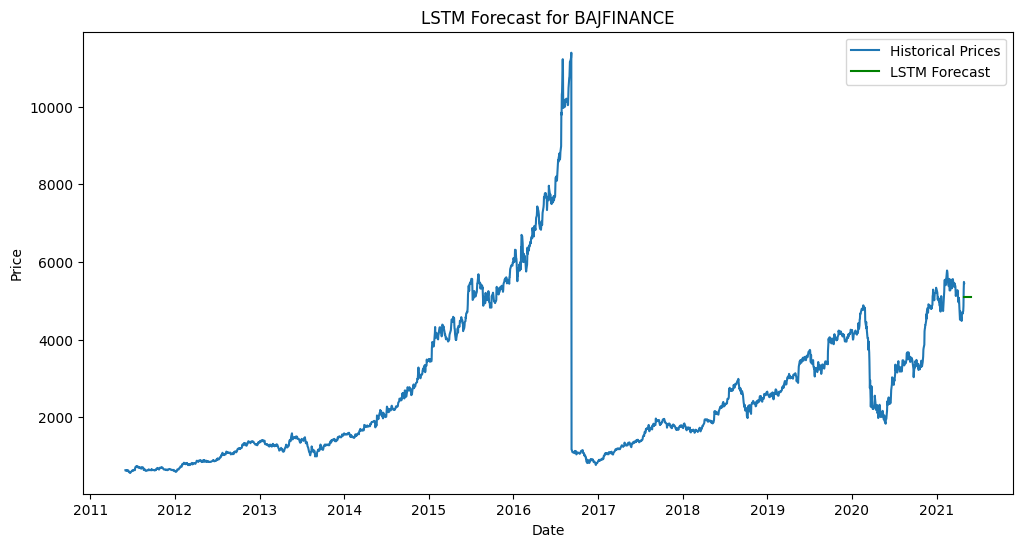

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


150/150 ━━━━━━━━━━━━━━━━━━━━ 15s 72ms/step - loss: 0.0137
Epoch 2/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 0.0025
Epoch 3/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 0.0023
Epoch 4/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - loss: 0.0023
Epoch 5/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 0.0018
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


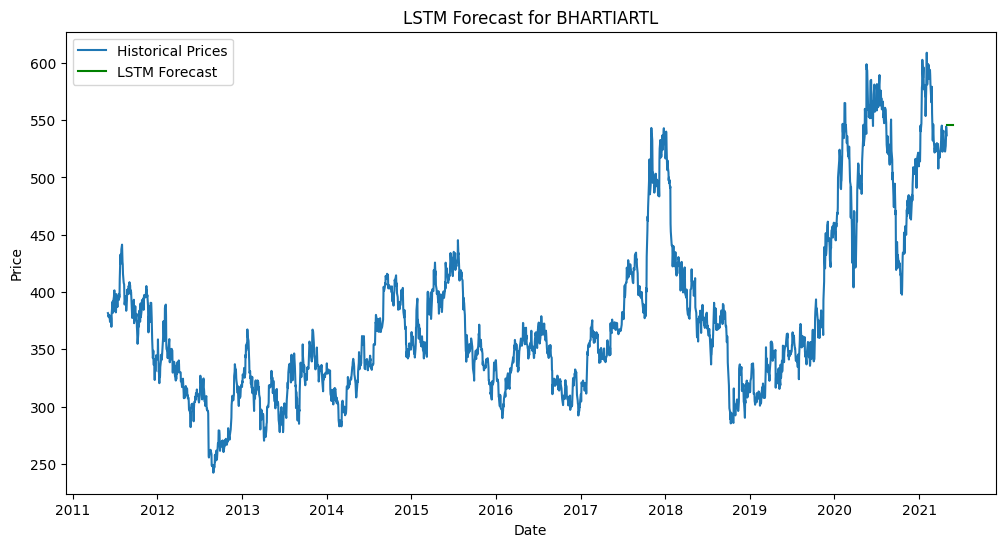

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


150/150 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - loss: 0.0154
Epoch 2/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - loss: 0.0029
Epoch 3/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - loss: 0.0027
Epoch 4/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - loss: 0.0030
Epoch 5/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - loss: 0.0018
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


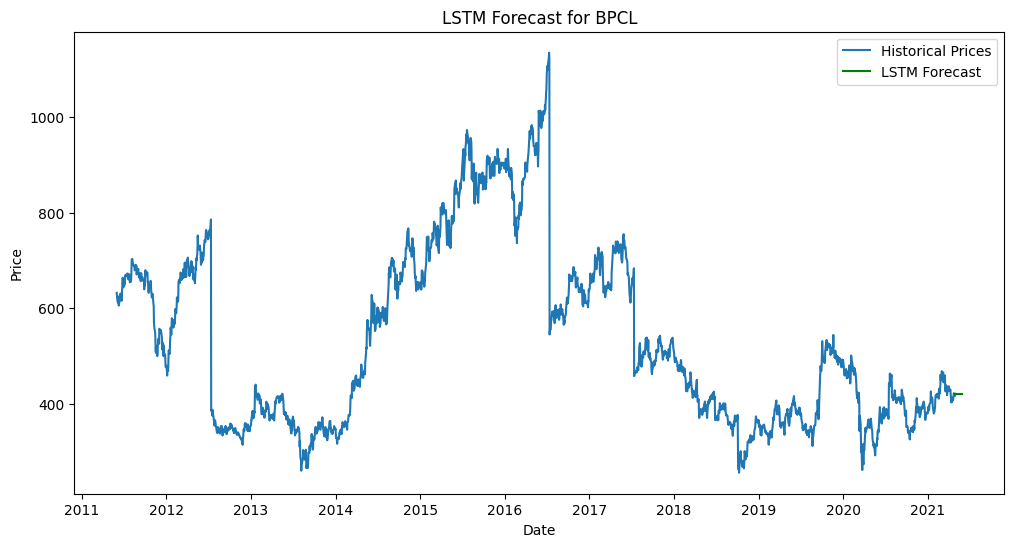

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


150/150 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0150
Epoch 2/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - loss: 0.0017
Epoch 3/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - loss: 0.0017
Epoch 4/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 0.0012
Epoch 5/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - loss: 0.0013
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


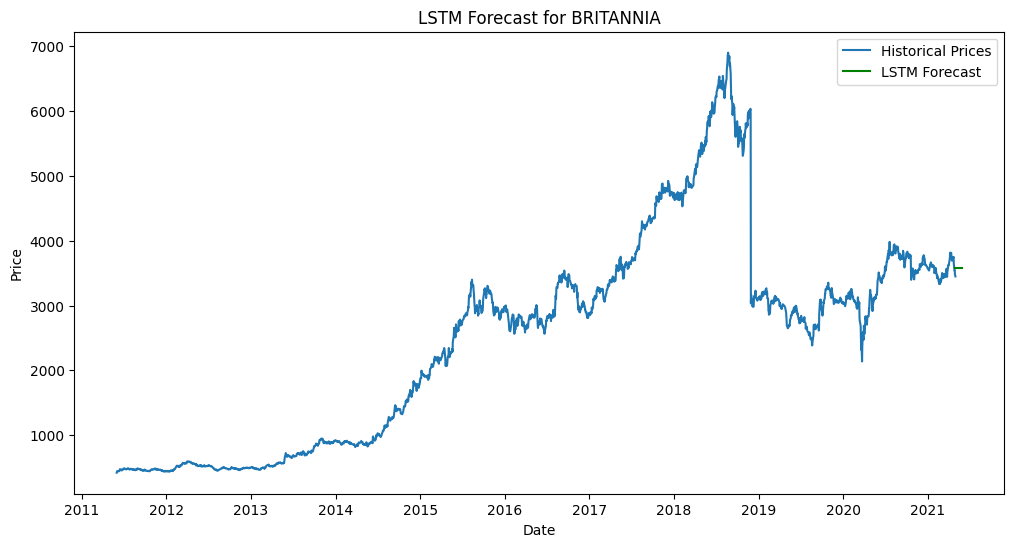

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


150/150 ━━━━━━━━━━━━━━━━━━━━ 13s 62ms/step - loss: 0.0273
Epoch 2/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 0.0024
Epoch 3/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - loss: 0.0018
Epoch 4/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 11s 64ms/step - loss: 0.0016
Epoch 5/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 0.0015
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


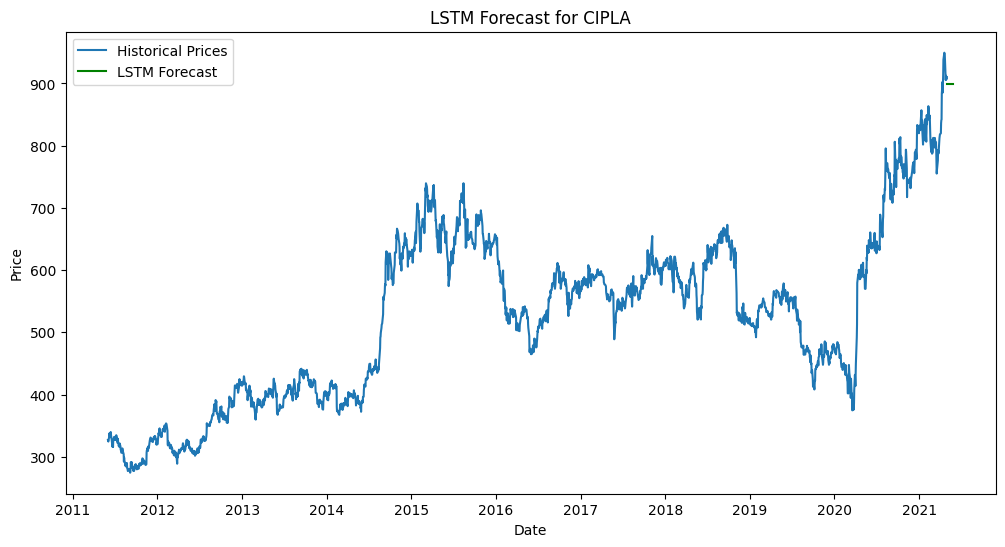

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


150/150 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.0356
Epoch 2/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 0.0034
Epoch 3/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - loss: 0.0027
Epoch 4/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - loss: 0.0024
Epoch 5/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 0.0021
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


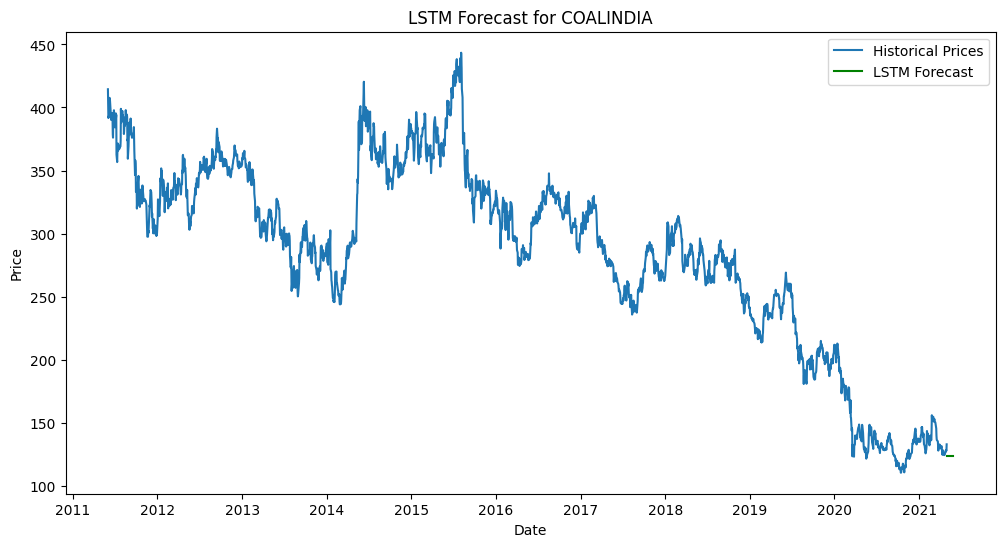

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


150/150 ━━━━━━━━━━━━━━━━━━━━ 13s 51ms/step - loss: 0.0211
Epoch 2/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - loss: 0.0019
Epoch 3/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - loss: 0.0022
Epoch 4/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 0.0017
Epoch 5/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - loss: 0.0014
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


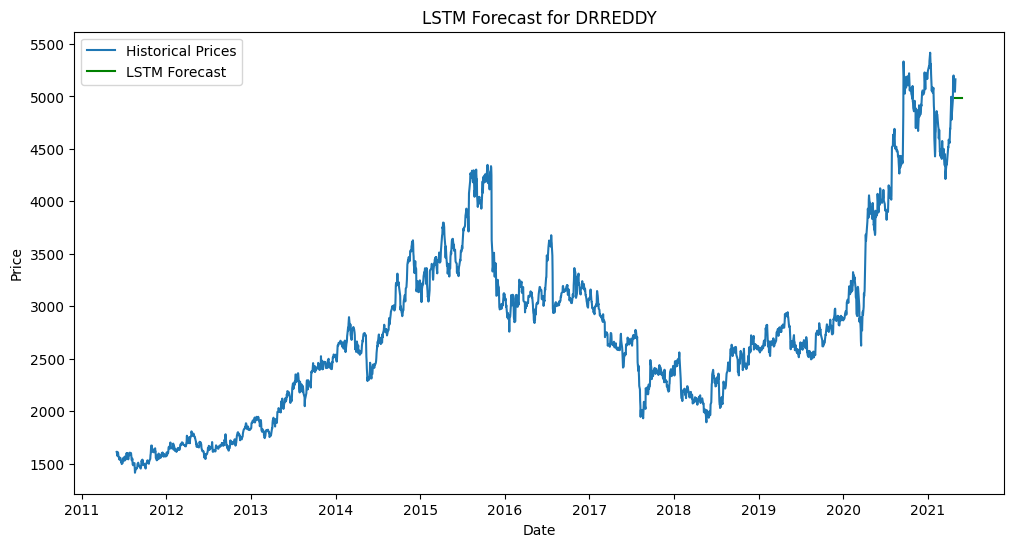

In [17]:
def lstm_forecast(df, name, steps=30):
    data = df[['Close']].values
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(data)

    X, y = [], []
    for i in range(60, len(data_scaled)):
        X.append(data_scaled[i-60:i, 0])
        y.append(data_scaled[i, 0])
    X, y = np.array(X), np.array(y)
    X = X.reshape((X.shape[0], X.shape[1], 1))

    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)),
        Dropout(0.2),
        LSTM(50, return_sequences=False),
        Dropout(0.2),
        Dense(25),
        Dense(1)
    ])

    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X, y, epochs=5, batch_size=16)

    test_input = data_scaled[-60:].reshape(1, 60, 1)
    predictions = model.predict(test_input)
    predictions = scaler.inverse_transform(predictions)

    future_dates = pd.date_range(df['Date'].iloc[-1], periods=steps, freq='D')
    predictions = np.repeat(predictions, steps)[:steps]

    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], df['Close'], label='Historical Prices')
    plt.plot(future_dates, predictions, label='LSTM Forecast', color='green')
    plt.title(f'LSTM Forecast for {name}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

for name, df in datasets.items():
    lstm_forecast(df, name)

In [18]:
print("Analysis and Forecasting Complete.")

Analysis and Forecasting Complete.
